# Исследование сервиса аренды самокатов.

В нашем распоряжении данные сервиса аренды самокатов GoFast. В данных которые нам передали есть информация о некскольких городах аренды самокатов, а так же о поездках пользователей. Что бы пользоваться данной арендой самокатов пользователи используют мобильное приложение, так же пользователи могут пользоваться сервисом приложения как с подпиской так и без нее. У двух этих сервисов разная стоимость одной минуты и стоимость старта.

Цель исследования.

1.Подсчет выручки от сервисов с подпиской или без подписки.

2.Проверить гипотезы.

Ход исследования.

Данные о аренде самокатов GoFast я получил в 3х файлах. Которые надо проверить на пропуски и дубликаты. После проверки я объеденю их в 1 датафреймы для удобства использования и преступлю к подсчету выручки и проверки гипотез.

Таким образом, мое исследование пройдет в 6 этапов:

-загрузка данных

-предобработка данных

-исследовательский анализ данных

-объединение данных

-подсчет выручки

-проверка гипотез


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:

In [72]:
try:
    data_users = pd.read_csv('/Users/Victor/Desktop/Github/Статистический анализ данных/Датасет/users_go.csv')     
except:
    data_users = pd.read_csv('/datasets/users_go.csv')
try:
    data_rides = pd.read_csv('/Users/Victor/Desktop/Github/Статистический анализ данных/Датасет/rides_go.csv')   
except:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
try:
    data_subscriptions = pd.read_csv('/Users/Victor/Desktop/Github/Статистический анализ данных/Датасет/subscriptions_go.csv')  
except:
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [5]:
display(data_users.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
display(data_rides.head())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
display(data_subscriptions.head())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [11]:
data_users_shape = data_users.shape
data_rides_shape = data_rides.shape
data_subscriptions_shape = data_subscriptions.shape
print(data_users_shape)
print(data_rides_shape)
print(data_subscriptions_shape)

(1565, 5)
(18068, 4)
(2, 4)


По полученным данным можно сказать что они читабельные, названия колонок приведены к единому регистру. Можно еще сказать что нет пропусков из вы веденных данных.

## Шаг 2. Предобработка данных

### Приведите столбец date к типу даты pandas.

In [14]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
#data_rides['date'].head()

### Создайте новый столбец с номером месяца на основе столбца date.

In [15]:
data_rides['month'] = (data_rides['date']).dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [16]:
data_rides.duplicated().sum()

0

In [17]:
data_subscriptions.duplicated().sum()

0

In [18]:
data_users.duplicated().sum()

31

In [19]:
data_users['user_id'] = data_users['user_id'].drop_duplicates()

In [20]:
data_users.duplicated().sum()

0

In [21]:
data_users.isna().sum()

user_id              31
name                  0
age                   0
city                  0
subscription_type     0
dtype: int64

In [22]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [23]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

По выводу данных видно что пропусков нет, как и предпологалось, но есть дубликаты которые мы удалили.

## Шаг 3. Исследовательский анализ данных

### частота встречаемости городов;

Text(0, 0.5, 'названия городов')

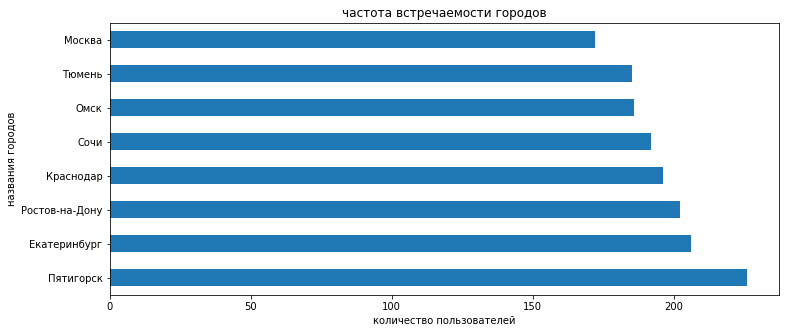

In [20]:
data_users['city'].value_counts().plot.barh(figsize=(12,5), title='частота встречаемости городов')
plt.xlabel('количество пользователей')
plt.ylabel('названия городов')

Из диаграмы видно что Пятигорск является лидером по количеству пользователей. В то время как Москва занимает последнее место по количеству пользователей.

### Соотношение пользователей с подпиской и без подписки;

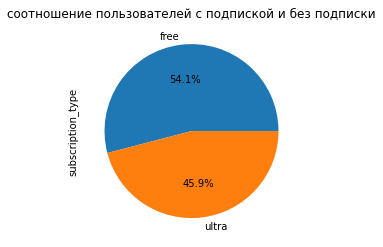

In [21]:
data_users['subscription_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('соотношение пользователей с подпиской и без подписки');

Как мы видим из круговой диаграммы что пользователей без подписки больше на 8.2% чем пользователей с подпиской.

### Возраст пользователей;

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

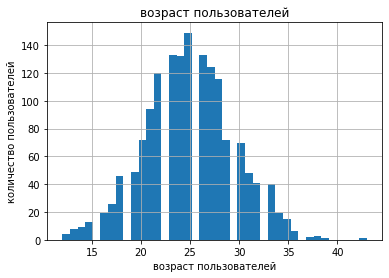

In [22]:
data_users['age'].plot(kind='hist', grid=True, bins= 40, title='возраст пользователей')
plt.xlabel('возраст пользователей')
plt.ylabel('количество пользователей')
data_users['age'].describe()

[Text(0.5, 1.0, 'возраст пользователей')]

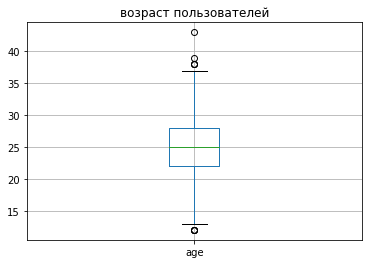

In [23]:
data_users.boxplot(column=['age']).set(title='возраст пользователей')

Возраст клиентов в основном сосредоточен в промежутке от 20 и до 28 лет. Но средний возварст пользователей это 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку;

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

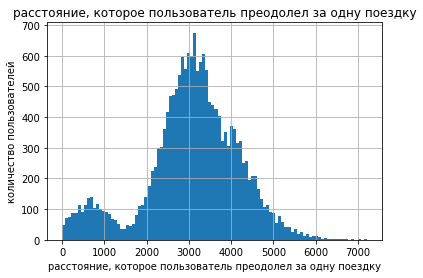

In [24]:
data_rides['distance'].plot(kind= 'hist', bins= 100, grid= True, title='расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('количество пользователей')
data_rides['distance'].describe()

count    16215.000000
mean      3291.799911
std        801.466787
min       1301.428166
25%       2727.249529
50%       3221.915943
75%       3841.726559
max       5494.799099
Name: distance, dtype: float64

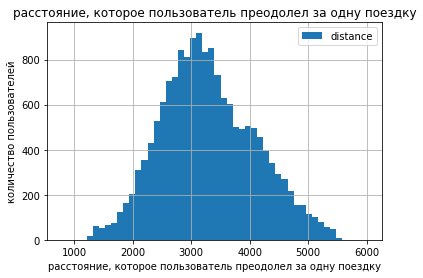

In [25]:
data_rides_distance = data_rides.query('distance >= 1300 and distance <= 5500')
data_rides_distance.plot(y= 'distance', kind= 'hist', bins= 50, grid= True, range= (800,6000), title='расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('количество пользователей')
data_rides_distance['distance'].describe()

[Text(0.5, 1.0, 'расстояние, которое пользователь преодолел за одну поездку')]

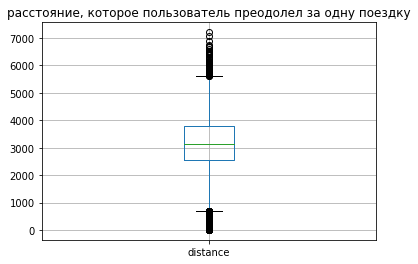

In [26]:
data_rides.boxplot(column=['distance']).set(title='расстояние, которое пользователь преодолел за одну поездку')

[Text(0.5, 1.0, 'расстояние, которое пользователь преодолел за одну поездку')]

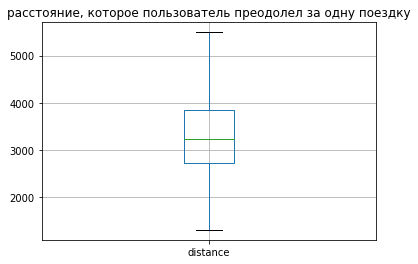

In [27]:
data_rides_distance.boxplot(column=['distance']).set(title='расстояние, которое пользователь преодолел за одну поездку')

В среднем пользователи проезжают 3 км. за одну поездку. Если откинуть вбросы то получается 3.3 км за поездку.

### Продолжительность поездок.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

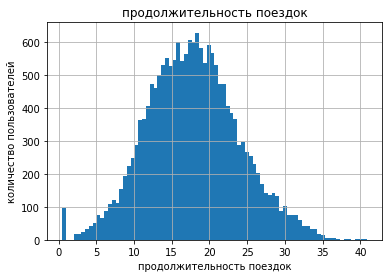

In [28]:
data_rides['duration'].plot(kind='hist', grid= True, bins= 80, title='продолжительность поездок')
plt.xlabel('продолжительность поездок')
plt.ylabel('количество пользователей')
data_rides['duration'].describe()

count    17794.000000
mean        17.789483
std          5.776266
min          3.006979
25%         13.659792
50%         17.669056
75%         21.635939
max         32.998485
Name: duration, dtype: float64

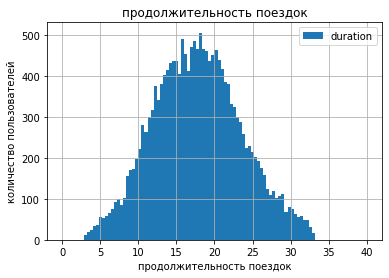

In [29]:
data_rides_durations = data_rides.query('duration >= 3 and duration <= 33')
data_rides_durations.plot(y= 'duration', kind= 'hist', bins= 100, grid= True, range= (0,40), title='продолжительность поездок')
plt.xlabel('продолжительность поездок')
plt.ylabel('количество пользователей')
data_rides_durations['duration'].describe()

[Text(0.5, 1.0, 'продолжительность поездок')]

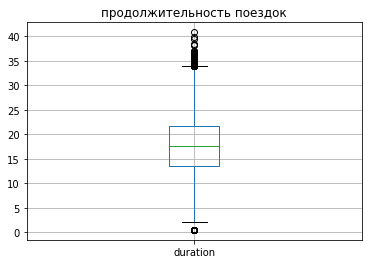

In [30]:
data_rides.boxplot(column=['duration']).set(title='продолжительность поездок')

[Text(0.5, 1.0, 'продолжительность поездок')]

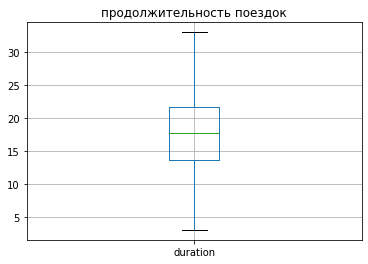

In [31]:
data_rides_durations.boxplot(column=['duration']).set(title='продолжительность поездок')

Продолжительность поездок у пользователей составляет в среднем 17 минут.

## Шаг 4. Объединение данных

### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [32]:
data_one = data_users.merge(data_rides, on='user_id', how='right')
data = data_one.merge(data_subscriptions, on='subscription_type', how='left')
data['user_id'] = data['user_id'].astype(int)
display(data.head(15))
data_shape = data.shape
print(data_shape)
print(data_users_shape)
print(data_rides_shape)
print(data_subscriptions_shape)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


(18068, 12)
(1565, 5)
(18068, 4)
(2, 4)


Из выведенных данных можно посчитать что данные после объединения остались точно такие же что и до.

### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях без подписки;

с данными о пользователях с подпиской.

In [33]:
data_ultra = data.query('subscription_type == "ultra"')
display(data_ultra.head(10))
data_ultra.shape

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


(6500, 12)

In [34]:
data_free = data.query('subscription_type == "free"')
display(data_free.head(10))
data_free.shape

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


(11568, 12)

### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

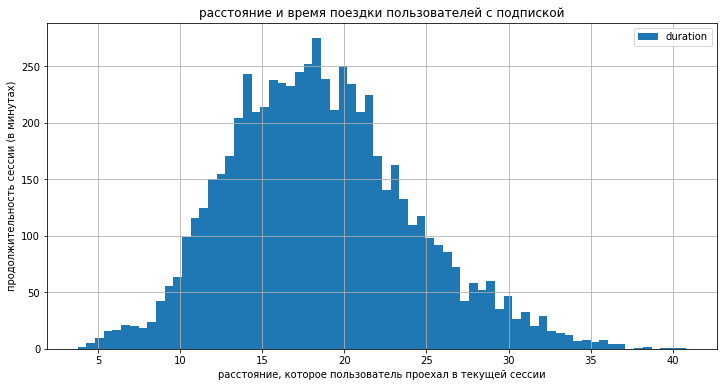

In [35]:
data_ultra.plot(x='distance', y='duration', kind='hist', grid=True, figsize=(12,6), bins= 70, title='расстояние и время поездки пользователей с подпиской')
plt.xlabel('расстояние, которое пользователь проехал в текущей сессии')
plt.ylabel('продолжительность сессии (в минутах)')
data_ultra['distance'].describe()

В среднем пользователи с подпиской проезжают от 1400 до 2200 метров за 3 часа.

Text(0, 0.5, 'продолжительность сессии (в минутах)')

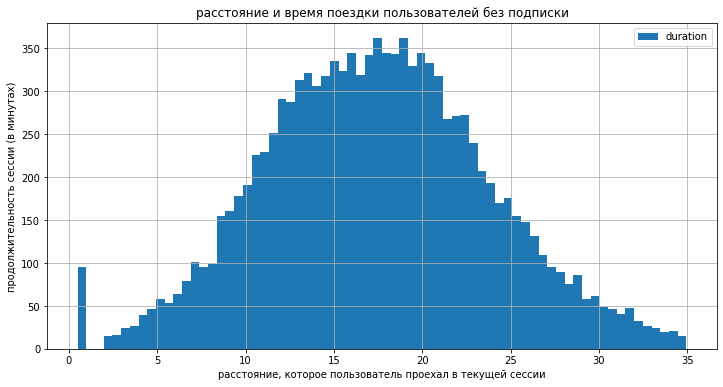

In [36]:
data_free.plot(x='distance', y='duration', kind='hist', grid=True, figsize=(12,6), bins= 70, title='расстояние и время поездки пользователей без подписки')
plt.xlabel('расстояние, которое пользователь проехал в текущей сессии')
plt.ylabel('продолжительность сессии (в минутах)')

В среднем пользователи без подпиской проезжают от 1400 до 2100 метров за 5 часов.

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

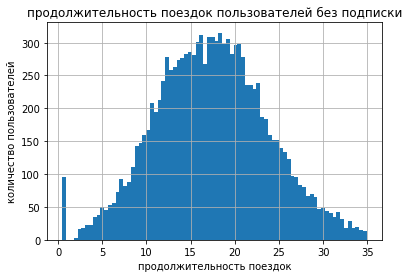

In [37]:
data_free['duration'].plot(kind='hist', grid= True, bins= 80, title='продолжительность поездок пользователей без подписки')
plt.xlabel('продолжительность поездок')
plt.ylabel('количество пользователей')
data_free['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

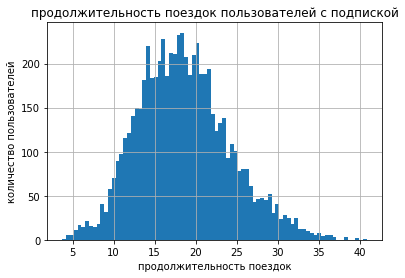

In [38]:
data_ultra['duration'].plot(kind='hist', grid= True, bins= 80, title='продолжительность поездок пользователей с подпиской')
plt.xlabel('продолжительность поездок')
plt.ylabel('количество пользователей')
data_ultra['duration'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

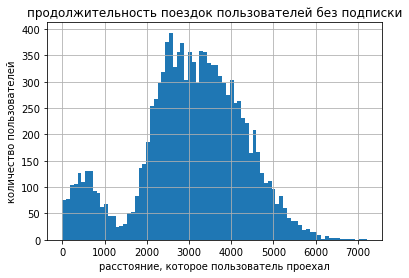

In [39]:
data_free['distance'].plot(kind='hist', grid= True, bins= 80, title='продолжительность поездок пользователей без подписки')
plt.xlabel('расстояние, которое пользователь проехал')
plt.ylabel('количество пользователей')
data_free['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

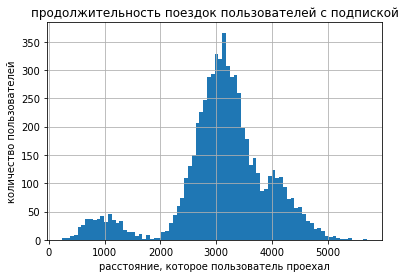

In [40]:
data_ultra['distance'].plot(kind='hist', grid= True, bins= 80, title='продолжительность поездок пользователей с подпиской')
plt.xlabel('расстояние, которое пользователь проехал')
plt.ylabel('количество пользователей')
data_ultra['distance'].describe()

Text(0.5, 1.0, 'расстояние, которое пользователи проехали')

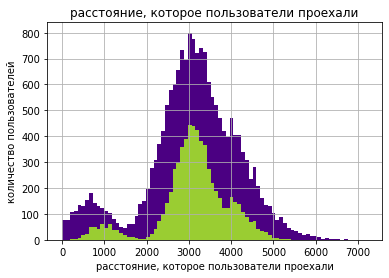

In [41]:
data1 = data_ultra['distance']
data2 = data_free['distance']
colors = ['YellowGreen', 'Indigo']
plt.hist([data1, data2], bins=80, stacked=True, color=colors, label=['sdf'])
plt.grid(True)
plt.xlabel('расстояние, которое пользователи проехали')
plt.ylabel('количество пользователей')
plt.title('расстояние, которое пользователи проехали')

Из данной диаграммы мы видим, вне зависимости от того, есть ли подписка у пользователя, среднее расстония поездок 3 км

Text(0.5, 1.0, 'продолжительность поездок')

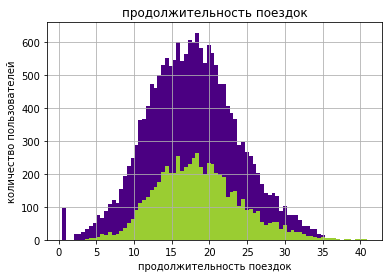

In [42]:
data3 = data_ultra['duration']
data4 = data_free['duration']
colors = ['YellowGreen', 'Indigo']
plt.hist([data3, data4], bins=80, stacked=True, color=colors, label=['sdf'])
plt.grid(True)
plt.xlabel('продолжительность поездок')
plt.ylabel('количество пользователей')
plt.title('продолжительность поездок')

В среднем поездки пользователей занимают от 14 до 22 минут

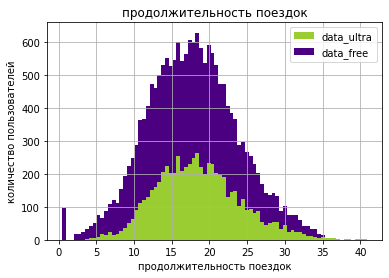

In [43]:
import matplotlib.pyplot as plt

data3 = data_ultra['duration']
data4 = data_free['duration']
colors = ['YellowGreen', 'Indigo']
plt.hist([data3, data4], bins=80, stacked=True, color=colors, label=['data_ultra', 'data_free'])
plt.grid(True)
plt.xlabel('продолжительность поездок')
plt.ylabel('количество пользователей')
plt.title('продолжительность поездок')
plt.legend()

plt.show()


## Шаг 5. Подсчёт выручки

In [44]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [ ]:
data.mean()

In [45]:
data['duration'] = np.ceil(data['duration'])

In [46]:
data_total = data.pivot_table(index=['user_id', 'month'], values=['distance','duration'], aggfunc=['count', 'sum'])
data_total.columns = ['_'.join(col).strip() for col in data_total.columns.values]
data_total = data_total.reset_index()
data_total = data_total.drop(['count_duration'], axis=1)
data_total = data_total.rename(columns={'count_distance':'trips', 'sum_distance':'total_distance', 'sum_duration':'total_duration'})
display(data_total.head(10))
data_total.shape

,user_id,month,trips,total_distance,total_duration
0,1,1,2,7027.511294,42.0
1,1,4,1,754.159807,7.0
2,1,8,2,6723.470560,46.0
3,1,10,2,5809.911100,32.0
4,1,11,3,7003.499363,56.0
5,1,12,2,6751.629942,28.0
6,2,3,3,10187.723006,63.0
7,2,4,2,6164.381824,40.0
8,2,6,1,3255.338202,14.0
9,2,7,2,6780.722964,48.0


(11331, 5)

### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3
25.3, 
25.5
25.5 и 
26.0
26.0 должны быть преобразованы к 
26
26.

In [47]:
data_total_revenue = data_total.merge(data_users, on='user_id', how='left')
data_total_revenue = data_total_revenue.merge(data_subscriptions, on='subscription_type', how='left')
data_total_revenue['revenue'] = data_total_revenue['start_ride_price'] * data_total_revenue['trips'] + data_total_revenue['minute_price'] * data_total_revenue['total_duration'] + data_total_revenue['subscription_fee']
display(data_total_revenue.head(10))
data_total_revenue.shape

,user_id,month,trips,total_distance,total_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42.0,Кира,22,Тюмень,ultra,6,0,199,451.0
1,1,4,1,754.159807,7.0,Кира,22,Тюмень,ultra,6,0,199,241.0
2,1,8,2,6723.470560,46.0,Кира,22,Тюмень,ultra,6,0,199,475.0
3,1,10,2,5809.911100,32.0,Кира,22,Тюмень,ultra,6,0,199,391.0
4,1,11,3,7003.499363,56.0,Кира,22,Тюмень,ultra,6,0,199,535.0
5,1,12,2,6751.629942,28.0,Кира,22,Тюмень,ultra,6,0,199,367.0
6,2,3,3,10187.723006,63.0,Станислав,31,Омск,ultra,6,0,199,577.0
7,2,4,2,6164.381824,40.0,Станислав,31,Омск,ultra,6,0,199,439.0
8,2,6,1,3255.338202,14.0,Станислав,31,Омск,ultra,6,0,199,283.0
9,2,7,2,6780.722964,48.0,Станислав,31,Омск,ultra,6,0,199,487.0


(11331, 13)

In [48]:
data_total_revenue_free = data_total_revenue.query('subscription_type == "free"')
data_total_revenue_free.head()

,user_id,month,trips,total_distance,total_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
4533,700,1,1,2515.690719,15.0,Айдар,22,Омск,free,8,50,0,170.0
4534,700,2,5,13446.659764,89.0,Айдар,22,Омск,free,8,50,0,962.0
4535,700,3,1,3798.334905,19.0,Айдар,22,Омск,free,8,50,0,202.0
4536,700,4,1,2984.551206,16.0,Айдар,22,Омск,free,8,50,0,178.0
4537,700,6,2,5927.650988,29.0,Айдар,22,Омск,free,8,50,0,332.0


In [49]:
data_total_revenue_ultra = data_total_revenue.query('subscription_type == "ultra"')
data_total_revenue_ultra.head()

,user_id,month,trips,total_distance,total_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42.0,Кира,22,Тюмень,ultra,6,0,199,451.0
1,1,4,1,754.159807,7.0,Кира,22,Тюмень,ultra,6,0,199,241.0
2,1,8,2,6723.470560,46.0,Кира,22,Тюмень,ultra,6,0,199,475.0
3,1,10,2,5809.911100,32.0,Кира,22,Тюмень,ultra,6,0,199,391.0
4,1,11,3,7003.499363,56.0,Кира,22,Тюмень,ultra,6,0,199,535.0


## Шаг 6. Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0 - Среднее время поездок для пользователей с подпиской равно, среднему время поездок для пользователей без подписки.

H1 - Среднее время поездок для пользователей с подпиской больше, чем среднее время поездок для пользователей без подписки.

In [50]:
data_total_revenue_free['total_duration'].mean()

30.444689614592527

In [51]:
data_total_revenue_ultra['total_duration'].mean()

27.29869843370836

In [52]:
sample_1 = data_ultra['duration']
sample_2 = data_free['duration']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Среднее время поездок для пользователей с подпиской выше, чем у пользователей без подписки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Среднее время поездок для пользователей с подпиской равно, среднему время поездок без подписки.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: Среднее время поездок для пользователей с подпиской выше, чем у пользователей без подписки.


### Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверьте гипотезу и сделайте выводы.

H0 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.

H1 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров. 

In [53]:
sample_1 = data_ultra['distance']

optimal_distance = 3130 # Расстояние одной поездки 

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(sample_1, optimal_distance, alternative='greater') # используйте метод st.ttest_1samp

print('p-значение:', results.pvalue) # аргумент p-value

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равна 3130 метров.')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равна 3130 метров.


In [54]:
data_total_revenue_ultra['total_distance'].mean()

4467.327381919405

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0 - помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки.

H1 - помесячная выручка пользователей с подпиской выше, чем выручка пользователей без подписки.

In [55]:
sample_1 = data_total_revenue_ultra['revenue']
sample_2 = data_total_revenue_free['revenue']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: помесячная выручка пользователей с подпиской выше, чем выручка пользователей без подписки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: помесячная выручка пользователей с подпиской выше, чем выручка пользователей без подписки.


### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


In [56]:
#scipy.stats.ttest_rel

Данный тест позволит посчитать о равенстве среднего значения генеральной совокупности до и после изменения

## Шаг 7. Вывод

Вывод: На основе проведенного анализа можно сделать вывод, что больше всего пользователей сервиса аренды самокатов GoFast в Пятигорске. Возраст клиентов в основном сосредоточен в промежутке от 20 и до 28 лет. В среднем пользователи проезжают около 3 км за одну поездку. Так же средняя продолжительность одной поездки составляет 17 минут. Из полученных данных провели гипотезы, которые нам показали, что пользователи с подписки тратят больше времени на поездку и выручка от этих пользователей выше, чем от пользователей без подпиской. 